##### 新潟大学大学院医歯学総合研究科　顎顔面放射線学分野　学生演習用
Modified by H.Nishiyama<br>
Fork from :https://github.com/oreilly-japan/deep-learning-from-scratch-5<br>
<br>
テキストの版（オリジナル）では、加算する乱数を0から1としているが、乱数を加算しない元の関数との比較を追加<br>
さらに、加算する乱数を-0.5から+0.5までの範囲に変化させた場合を追加<br>



In [1]:
import torch

#### 比較検討のためにテキストの版に追加

In [2]:
aa = 2
bb = 5

### 1．オリジナルの版
テキストの版：ノイズとして0から1までの乱数を加算

In [3]:
torch.manual_seed(0)
x = torch.rand(100, 1)
#=# y = 5 + 2 * x + torch.rand(100, 1)
y = bb + aa * x + torch.rand(100, 1)

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [4]:
def predict(x):
    y = x @ W + b
    return y

In [5]:
def mean_squared_error(x0, x1):
    diff = x0 - x1
    N = len(diff)
    return torch.sum(diff ** 2) / N

In [6]:
lr = 0.1
iters = 100

In [7]:
for i in range(iters):
    y_hat = predict(x)
    loss = mean_squared_error(y, y_hat)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 10 == 0: # print every 10 iterations
        print(loss.item())

41.89796447753906
0.22483211755752563
0.0925208106637001
0.0888015553355217
0.08627457916736603
0.08435674756765366
0.0829005315899849
0.0817948430776596
0.08095530420541763
0.08031783998012543


In [8]:
print(loss.item())
print('====')
print('W =', W.item())
print('b =', b.item())

0.07987643033266068
====
W = 2.2863590717315674
b = 5.3144850730896


#### テキストの版に追加

In [9]:
print("元の関数の傾き：",f'{aa=}')
print("差分：W-aa=",f'{W.item()-aa}')
print("元の関数の切片：",f'{bb=}')
print("差分：b-bb=",f'{b.item()-bb}')

元の関数の傾き： aa=2
差分：W-aa= 0.2863590717315674
元の関数の切片： bb=5
差分：b-bb= 0.3144850730895996


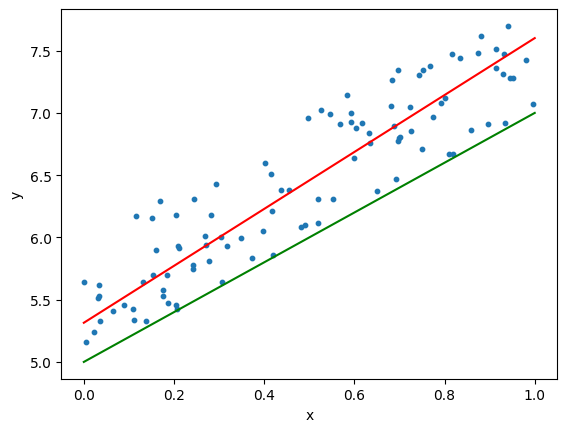

In [10]:
# plot
import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
xx = torch.tensor([[0.0], [1.0]])
yy = W.detach().numpy() * xx.detach().numpy() + b.detach().numpy()
yy2 = aa * xx + bb
plt.plot(xx, yy, color='red')
plt.plot(xx, yy2,color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 2．改定版
ノイズとして-0.5から+0.5までの乱数を加算

In [11]:
torch.manual_seed(0)
x = torch.rand(100, 1)
#=# y = 5 + 2 * x + torch.rand(100, 1)
y = bb + aa * x + torch.rand(100, 1) - 0.5

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [12]:
for i in range(iters):
    y_hat = predict(x)
    loss = mean_squared_error(y, y_hat)

    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data

    W.grad.zero_()
    b.grad.zero_()

    if i % 10 == 0: # print every 10 iterations
        print(loss.item())

35.712032318115234
0.194411501288414
0.08375012129545212
0.08218597620725632
0.08125147968530655
0.08054273575544357
0.08000458776950836
0.07959596812725067
0.07928571105003357
0.07905013114213943


In [13]:
print(loss.item())
print('====')
print('W =', W.item())
print('b =', b.item())

0.07888700067996979
====
W = 2.2344651222229004
b = 4.841691017150879


In [14]:
print("元の関数の傾き：",f'{aa=}')
print("差分：W-aa=",f'{W.item()-aa}')
print("元の関数の切片：",f'{bb=}')
print("差分：b-bb=",f'{b.item()-bb}')

元の関数の傾き： aa=2
差分：W-aa= 0.2344651222229004
元の関数の切片： bb=5
差分：b-bb= -0.1583089828491211


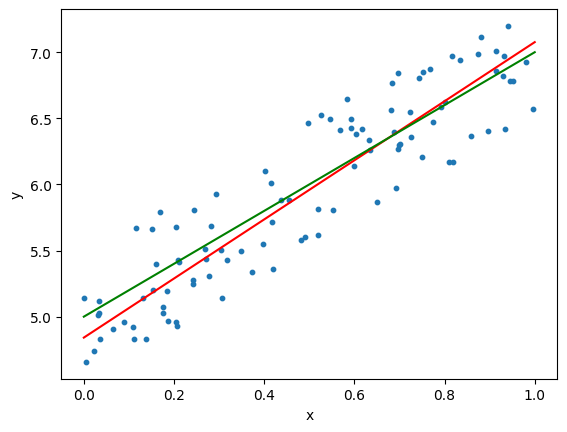

In [15]:
# plot
import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
xx = torch.tensor([[0.0], [1.0]])
yy = W.detach().numpy() * xx.detach().numpy() + b.detach().numpy()
yy2 = aa * xx + bb
plt.plot(xx, yy, color='red')
plt.plot(xx, yy2,color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()